## Import thư viện

In [56]:
# Thư viện đọc file và chuyển kiểu
import pandas as pd
import numpy as np

# Đổi kiểu dữ liệu datetime
import datetime as dt

# Import các thư viện train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import sklearn để tính toán các giá trị cũng như scaled dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
%matplotlib inline

## Đọc dữ liệu từ file

In [57]:
df = pd.read_csv('../../Dataset/CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1114,2023-06-06,37.910000,39.049999,37.580002,38.820000,38.820000,2261700
1115,2023-06-07,39.160000,40.029999,38.250000,39.959999,39.959999,4382500
1116,2023-06-08,39.700001,39.840000,36.750000,39.000000,39.000000,9705500
1117,2023-06-09,39.250000,40.110001,38.480000,38.810001,38.810001,4493800


In [58]:
# Chuyển đổi kiểu dữ liệu của cột Date sang datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột Date làm index của DataFrame
df.set_index('Date', inplace=True)

In [59]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...
2023-06-06,37.910000,39.049999,37.580002,38.820000,38.820000,2261700
2023-06-07,39.160000,40.029999,38.250000,39.959999,39.959999,4382500
2023-06-08,39.700001,39.840000,36.750000,39.000000,39.000000,9705500


## Phân tích dữ liệu

### Trực quan hóa dữ liệu

## Xây dựng mô hình

In [60]:
# Select column 'Close'
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [61]:
#  Scaler data
scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(np.array(df_Close))

### Chia tập train, test, validation

In [62]:
# Chia dữ liệu thành tập train, validation và test theo tỉ lệ 7:2:1
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.2)
test_size = len(df_scaled) - train_size - val_size

train_data = df_scaled[0 : train_size, :]
val_data = df_scaled[train_size : train_size + val_size, :]
test_data = df_scaled[train_size + val_size : len(df_scaled), :]

In [63]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [64]:
# Thêm dữ liệu cho tập train, validation và test
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [65]:
# Make input for DFNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

### Xây dựng mô hình Deep Feedforward Neural Network

In [66]:
# Tạo một đối tượng Sequential model
model = Sequential()

model.add(Dense(128, input_dim=time_step, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')  

### Biên dịch mô hình

### Huấn luyện mô hình

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

Epoch 1/100


24/24 [==============================] - 1s 11ms/step - loss: 0.0449 - val_loss: 0.0073
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0076
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 9.3605e-04 - val_loss: 0.0024
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 7.5553e-04 - val_loss: 0.0021
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 8.9233e-04 - val_loss: 0.0018
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 6.4073e-04 - val_loss: 0.0018
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 7.4015e-04 - val_loss: 0.0018


### Vẽ đồ thị loss trên tập train và tập validation

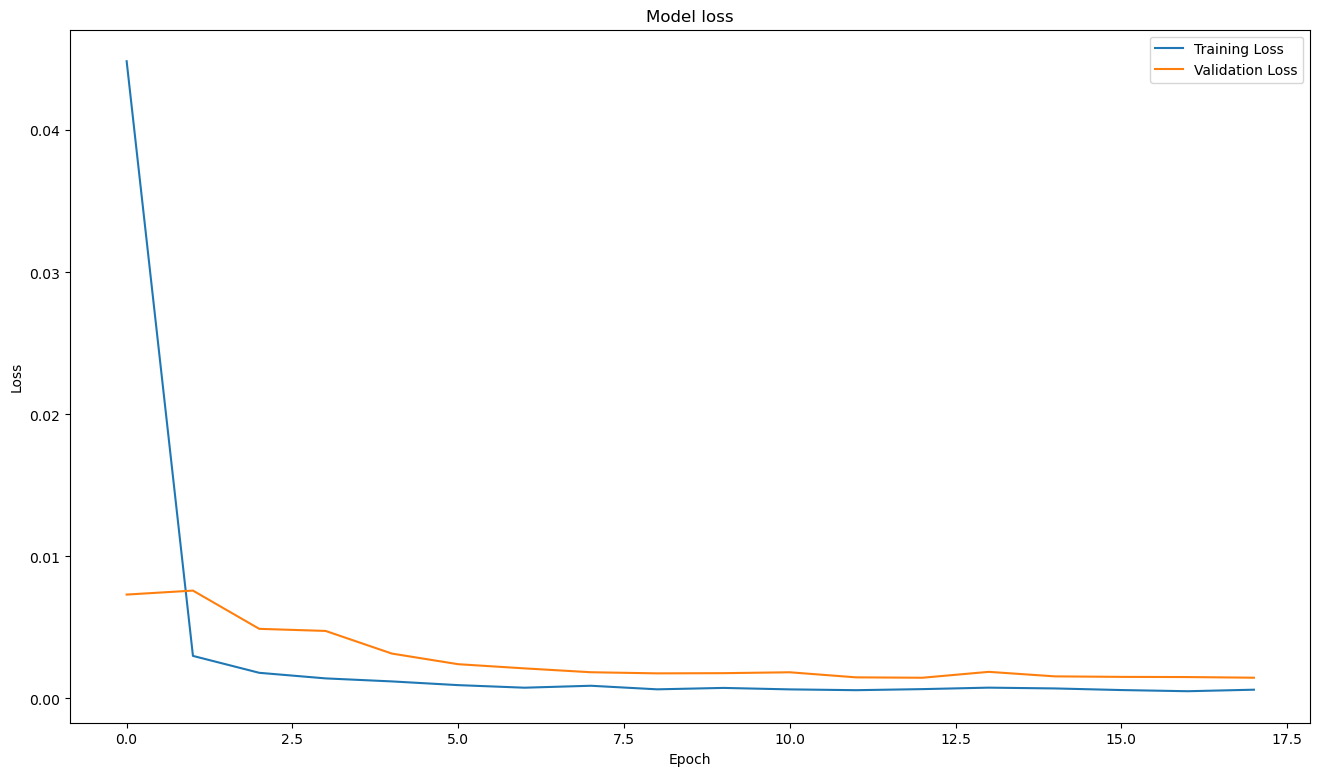

In [69]:
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<h2>Dự đoán CLose Price trên tập test và validation

In [70]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

7/7 [==============================] - 0s 2ms/step


In [71]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [72]:
# Evaluate the accuracy of validation
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
val_mse = mean_squared_error(y_pred_val, y_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_pred_val, y_val)

print(f"Validation MAPE: ", val_mape)
print(f"Validation RMSE: ", val_rmse)
print(f"Validation MSLE: ", val_msle)

Validation MAPE:  0.9945647192933205
Validation RMSE:  89.1103737967258
Validation MSLE:  16.329761770871695


In [73]:
# Evaluate the accuracy of test
test_mape = mean_absolute_percentage_error(y_pred, ytest)
test_mse = mean_squared_error(y_pred, ytest)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_pred, ytest)

print(f"Testing MAPE: ", test_mape)
print(f"Testing RMSE: ", test_rmse)
print(f"Testing MSLE: ", test_msle)

Testing MAPE:  0.9964967845683101
Testing RMSE:  57.19378373647338
Testing MSLE:  14.65365725062092


In [74]:
x_input = val_data[5:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Define i
i = 0

# List storage value for next 30 days
prediction_next30_days = []

while(i < 30):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[-time_step:])

        x_input = x_input.reshape((1, time_step, 1))
        y_hat = model.predict(x_input, verbose=0)

        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]

        prediction_next30_days.extend(y_hat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, time_step, 1))
        y_hat = model.predict(x_input, verbose = 0)

        temp_input.extend(y_hat[0].tolist())

        prediction_next30_days.extend(y_hat.tolist())
        i = i + 1

In [75]:
# Print predict next 30 days
print(prediction_next30_days)

[[0.11986871063709259], [0.11274393647909164], [0.11977074295282364], [0.11327394843101501], [0.11043422669172287], [0.11641114950180054], [0.1163720190525055], [0.12055759876966476], [0.12233041226863861], [0.12768685817718506], [0.12571197748184204], [0.12670499086380005], [0.12397187203168869], [0.12341325730085373], [0.12170065194368362], [0.12292345613241196], [0.1253955066204071], [0.12589505314826965], [0.12517687678337097], [0.1232285276055336], [0.12390827387571335], [0.12431143969297409], [0.12634368240833282], [0.12342607229948044], [0.12662623822689056], [0.12480275332927704], [0.12778964638710022], [0.12767428159713745], [0.12761837244033813], [0.1300889402627945]]


In [77]:
# Get the last date from the current index
last_date = df.index.max()

# Create a list of indices starting from the next date for 30 days
future_dates = pd.date_range(start=pd.to_datetime(last_date) + pd.DateOffset(days=1), periods=30, freq='D')

In [78]:
# Convert from list to array
prediction_next30_days = np.array(prediction_next30_days)

# Convert to normal values from 0, 1
prediction_next30_days = scaler.inverse_transform(prediction_next30_days).reshape(-1)

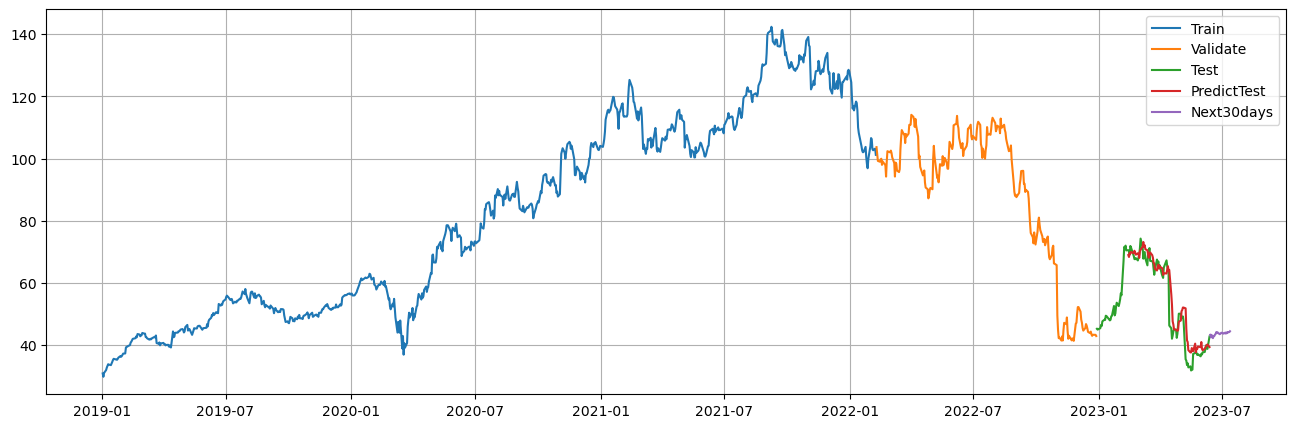

In [82]:
# Visualization
plt.figure(figsize=(16, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

plt.plot(df.index[train_size : train_size + val_size], scaler.inverse_transform(val_data))

plt.plot(df.index[train_size + val_size : ], scaler.inverse_transform(test_data))

plt.plot(df.index[train_size + val_size + time_step: ], y_pred)

plt.plot(future_dates, prediction_next30_days)

plt.legend(['Train','Validate','Test','PredictTest','Next30days'])
plt.grid()
plt.show()